In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
def seedaj():
    with open("/dev/urandom", 'rb') as f:
        return (int.from_bytes(f.read(4), 'big'))
def konc():
    import os
    duration = 1  # second
    freq = 880  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [2]:
def masa(N = 1e6, p=0):
    N = int(N)
    #np.random.seed(seedaj())
    def v_telesu(x,y,z):

        p1 = x*x+y*y < 1
        p2 = x*x+z*z < 1
        p3 = y*y+z*z < 1
        return p1 & p2 & p3
    V_0 = 2*2*2
    def rho(x,y,z):
        if p==0:
            return 1
        else:
            return (radij(x,y,z))**p
    def radij(x,y,z):
        return np.sqrt(x*x+y*y+z*z)
    #Mainloop:
    sumajca = 0
    for i in range(N):
        x,y,z = np.random.uniform(-1,1,3)
        if v_telesu(x,y,z):
            sumajca += rho(x,y,z)
    #dodamo konstante pred vsoto
    sumajca *= V_0/N
    return sumajca

def masaa(N = 1e6, p=0):
    N = int(N)
    #np.random.seed(seedaj())
    def v_telesu(arej):
        x,y,z = arej
        p1 = x*x+y*y < 1
        p2 = x*x+z*z < 1
        p3 = y*y+z*z < 1
        return p1 & p2 & p3
    V_0 = 2*2*2
    def rho(arej):
        x,y,z = arej
        if p==0:
            return 1
        else:
            return (radij(arej))**p
    def radij(arej):
        x,y,z = arej
        return np.sqrt(x*x+y*y+z*z)
    #Mainloop:
    sumajca = 0
    #XYZ = np.random.uniform(-1,1,(N, 3))
    for i in range(N):
        XYZ = np.random.uniform(-1,1,3)
        if v_telesu(XYZ):
            sumajca += rho(XYZ)
    #dodamo konstante pred vsoto
    sumajca *= V_0/N
    return sumajca

masaa(N=1e3)

4.704

In [18]:
%timeit masaa(N=1e5)

1.96 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
%timeit masa(N=1e5)

1.8 s ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
blu = potek_m
razpon_njev = np.logspace(start=0, stop=8, num=25)
print(razpon_njev, end="\r")
potek_m = pd.DataFrame(index=razpon_njev)
potek_m["N"] = potek_m.index.astype(int)
potek_m["m_hat"] = potek_m.apply(lambda row: masa(row.N), axis=1)
print("KAMPLILU JEEEE!!!!")
potek_m = potek_m.append(blu, sort=True)
potek_m

NameError: name 'potek_m' is not defined

In [ ]:
potek_m.sort_values(by="N", inplace=True)
plt.plot(potek_m.N, potek_m.m_hat)
plt.xlabel(r"$N$")
plt.ylabel(r"$\hat{m}$")
plt.title(r"Cenilka mase, $p=0$")
plt.semilogx()
plt.savefig("1-1-masa.pdf")
plt.show()

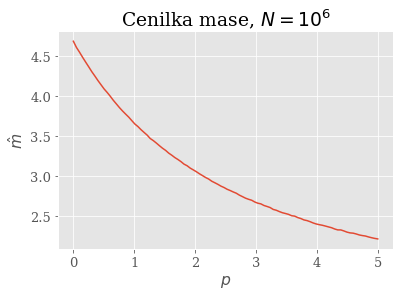

CPU times: user 39min 37s, sys: 24.8 s, total: 40min 2s
Wall time: 39min 43s


In [7]:
%%time
razpon_p = np.linspace(0, 5, 100)
potek_p = pd.DataFrame(index=razpon_p)
potek_p["m_hat"] = [masa(N=int(1e6), p=p) for p in potek_p.index]
konc()
potek_p.to_csv("podatki/p1.csv")


potek_p.sort_index(inplace=True)
plt.plot(potek_p.index, potek_p.m_hat)
plt.xlabel(r"$p$")
plt.ylabel(r"$\hat{m}$")
plt.title(r"Cenilka mase, $N=10^6$")
plt.savefig("1-1-p.pdf")
plt.show()

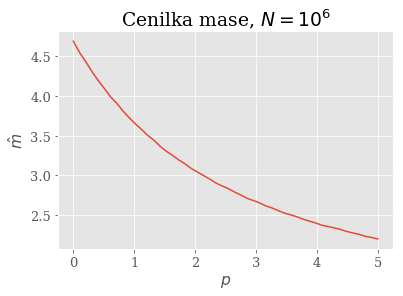

CPU times: user 21min 5s, sys: 17.9 s, total: 21min 23s
Wall time: 21min 7s


In [20]:
%%time
razpon_p = np.linspace(0, 5, 50)
potek_p = pd.DataFrame(index=razpon_p)
_ = []
for i, p in enumerate(razpon_p):
    print(f"i = {i}", end="\r")
    _.append(masa(N=int(1e6), p=p))
    
#potek_p["m_hat"] = [masa(N=int(14), p=p) for p in potek_p.index]
potek_p["m_hat"] = _
konc()
potek_p.to_csv("podatki/p1.csv")


potek_p.sort_index(inplace=True)
plt.plot(potek_p.index, potek_p.m_hat)
plt.xlabel(r"$p$")
plt.ylabel(r"$\hat{m}$")
plt.title(r"Cenilka mase, $N=10^6$")
plt.savefig("1-1-p.pdf")
plt.show()

In [1]:
def momenta(N = 1e6, p=0):
    N = int(N)
    #np.random.seed(seedaj())
    def v_telesu(arej):
        x,y,z = arej
        p1 = x*x+y*y < 1
        p2 = x*x+z*z < 1
        p3 = y*y+z*z < 1
        return p1 & p2 & p3
    V_0 = 2*2*2
    def rho(arej):
        x,y,z = arej
        if p==0:
            return 1
        else:
            return (radij(arej))**p
    def radij(arej):
        x,y,z = arej
        return np.sqrt(x*x+y*y+z*z)
    #Mainloop:
    sumajca = 0
    #XYZ = np.random.uniform(-1,1,(N, 3))
    for i in range(N):
        XYZ = np.random.uniform(-1,1,3)
        if v_telesu(XYZ):
            sumajca += radij(XYZ)**2 * rho(XYZ)
    #dodamo konstante pred vsoto
    sumajca *= V_0/N
    return sumajca

i: 0 od 50
i: 1 od 50
i: 2 od 50
i: 3 od 50
i: 4 od 50
i: 5 od 50
i: 6 od 50
i: 7 od 50
i: 8 od 50
i: 9 od 50
i: 10 od 50
i: 11 od 50
i: 12 od 50
i: 13 od 50
i: 14 od 50
i: 15 od 50
i: 16 od 50
i: 17 od 50
i: 18 od 50
i: 19 od 50
i: 20 od 50
i: 21 od 50
i: 22 od 50
i: 23 od 50
i: 24 od 50
i: 25 od 50
i: 26 od 50
i: 27 od 50
i: 28 od 50
i: 29 od 50
i: 30 od 50
i: 31 od 50
i: 32 od 50
i: 33 od 50
i: 34 od 50
i: 35 od 50
i: 36 od 50
i: 37 od 50
i: 38 od 50
i: 39 od 50
i: 40 od 50
i: 41 od 50
i: 42 od 50
i: 43 od 50
i: 44 od 50
i: 45 od 50
i: 46 od 50
i: 47 od 50
i: 48 od 50
i: 49 od 50


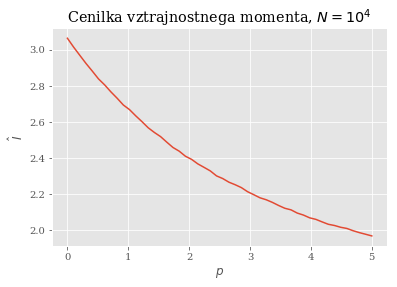

CPU times: user 30min 28s, sys: 35.2 s, total: 31min 3s
Wall time: 30min 27s


In [8]:
N = np.logspace(1, 8)
n = []
p = []
for i in N:
    i = int(i)
    n.append(i)
    p.append(momenta(N=i))

    

i: 10.0 od 20
i: 23.357214690901223 od 20
i: 54.5559478116852 od 20
i: 127.42749857031335 od 20
i: 297.63514416313194 od 20
i: 695.1927961775606 od 20
i: 1623.776739188721 od 20
i: 3792.69019073225 od 20
i: 8858.667904100823 od 20
i: 20691.3808111479 od 20
i: 48329.30238571752 od 20
i: 112883.78916846884 od 20
i: 263665.08987303555 od 20
i: 615848.2110660254 od 20
i: 1438449.888287663 od 20
i: 3359818.286283781 od 20
i: 7847599.703514607 od 20
i: 18329807.108324338 od 20
i: 42813323.98719387 od 20
i: 100000000.0 od 20


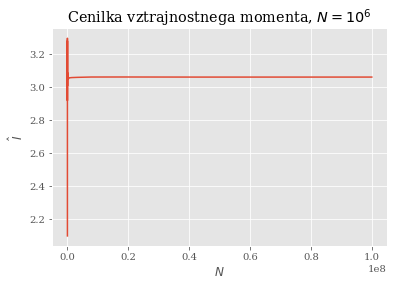

CPU times: user 1h 24min 12s, sys: 1min, total: 1h 25min 13s
Wall time: 1h 24min 15s


In [6]:
%%time
razpon_N = np.logspace(1,8,20)
potek_N = pd.DataFrame(index=razpon_N)
foo = []
for i, N in enumerate(razpon_N):
    print(f"i: {i} od 20")
    foo.append(momenta(N=N))
potek_N["m_hat"] = foo
konc()
potek_N.to_csv("podatki/momentn.csv")


potek_N.sort_index(inplace=True)
plt.plot(potek_N.index.astype(int), potek_N.m_hat)
plt.xlabel(r"$N$")
plt.ylabel(r"$\hat{I}$")
plt.title(r"Cenilka vztrajnostnega momenta, $N=10^6$")
plt.savefig("1-2-n.pdf")
plt.show()

i: 0 od 50
i: 1 od 50
i: 2 od 50
i: 3 od 50
i: 4 od 50
i: 5 od 50
i: 6 od 50
i: 7 od 50
i: 8 od 50
i: 9 od 50
i: 10 od 50
i: 11 od 50
i: 12 od 50
i: 13 od 50
i: 14 od 50
i: 15 od 50
i: 16 od 50
i: 17 od 50
i: 18 od 50
i: 19 od 50
i: 20 od 50
i: 21 od 50
i: 22 od 50
i: 23 od 50
i: 24 od 50
i: 25 od 50
i: 26 od 50
i: 27 od 50
i: 28 od 50
i: 29 od 50
i: 30 od 50
i: 31 od 50
i: 32 od 50
i: 33 od 50
i: 34 od 50
i: 35 od 50
i: 36 od 50
i: 37 od 50
i: 38 od 50
i: 39 od 50
i: 40 od 50
i: 41 od 50
i: 42 od 50
i: 43 od 50
i: 44 od 50
i: 45 od 50
i: 46 od 50
i: 47 od 50
i: 48 od 50
i: 49 od 50


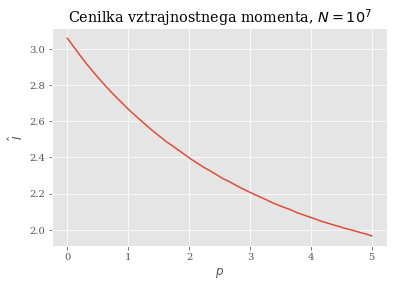

CPU times: user 4h 10min 9s, sys: 2min 24s, total: 4h 12min 34s
Wall time: 4h 21min 22s


In [13]:
%%time
razpon_p = np.linspace(0, 5, 50)
potek_p = pd.DataFrame(index=razpon_p)
foo = []
for i, p in enumerate(razpon_p):
    print(f"i: {i} od 50")
    foo.append(momenta(N=1e7, p=p))
potek_p["m_hat"] = foo
#konc()
potek_p.to_csv("podatki/momentp2.csv")


potek_p.sort_index(inplace=True)
plt.plot(potek_p.index, potek_p.m_hat)
plt.xlabel(r"$p$")
plt.ylabel(r"$\hat{I}$")
plt.title(r"Cenilka vztrajnostnega momenta, $N=10^7$")
plt.savefig("1-2-p.pdf")
plt.show()